In [1]:
from neurodynex.working_memory_network import wm_model
from neurodynex.tools import plot_tools
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline

INFO       width adjusted from 1. ms to 1.1 ms [brian2.monitors.ratemonitor.adjusted_width]


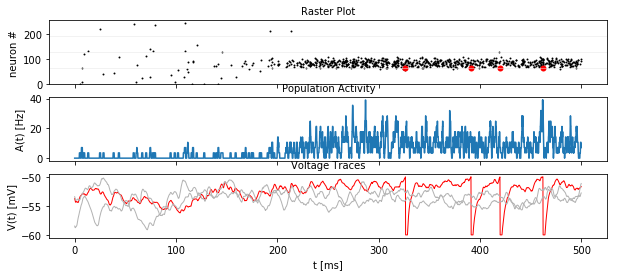

In [2]:
wm_model.getting_started()

## 12.1. Exercise: Spontanous bump formation
We study the structure and activity of the following network.

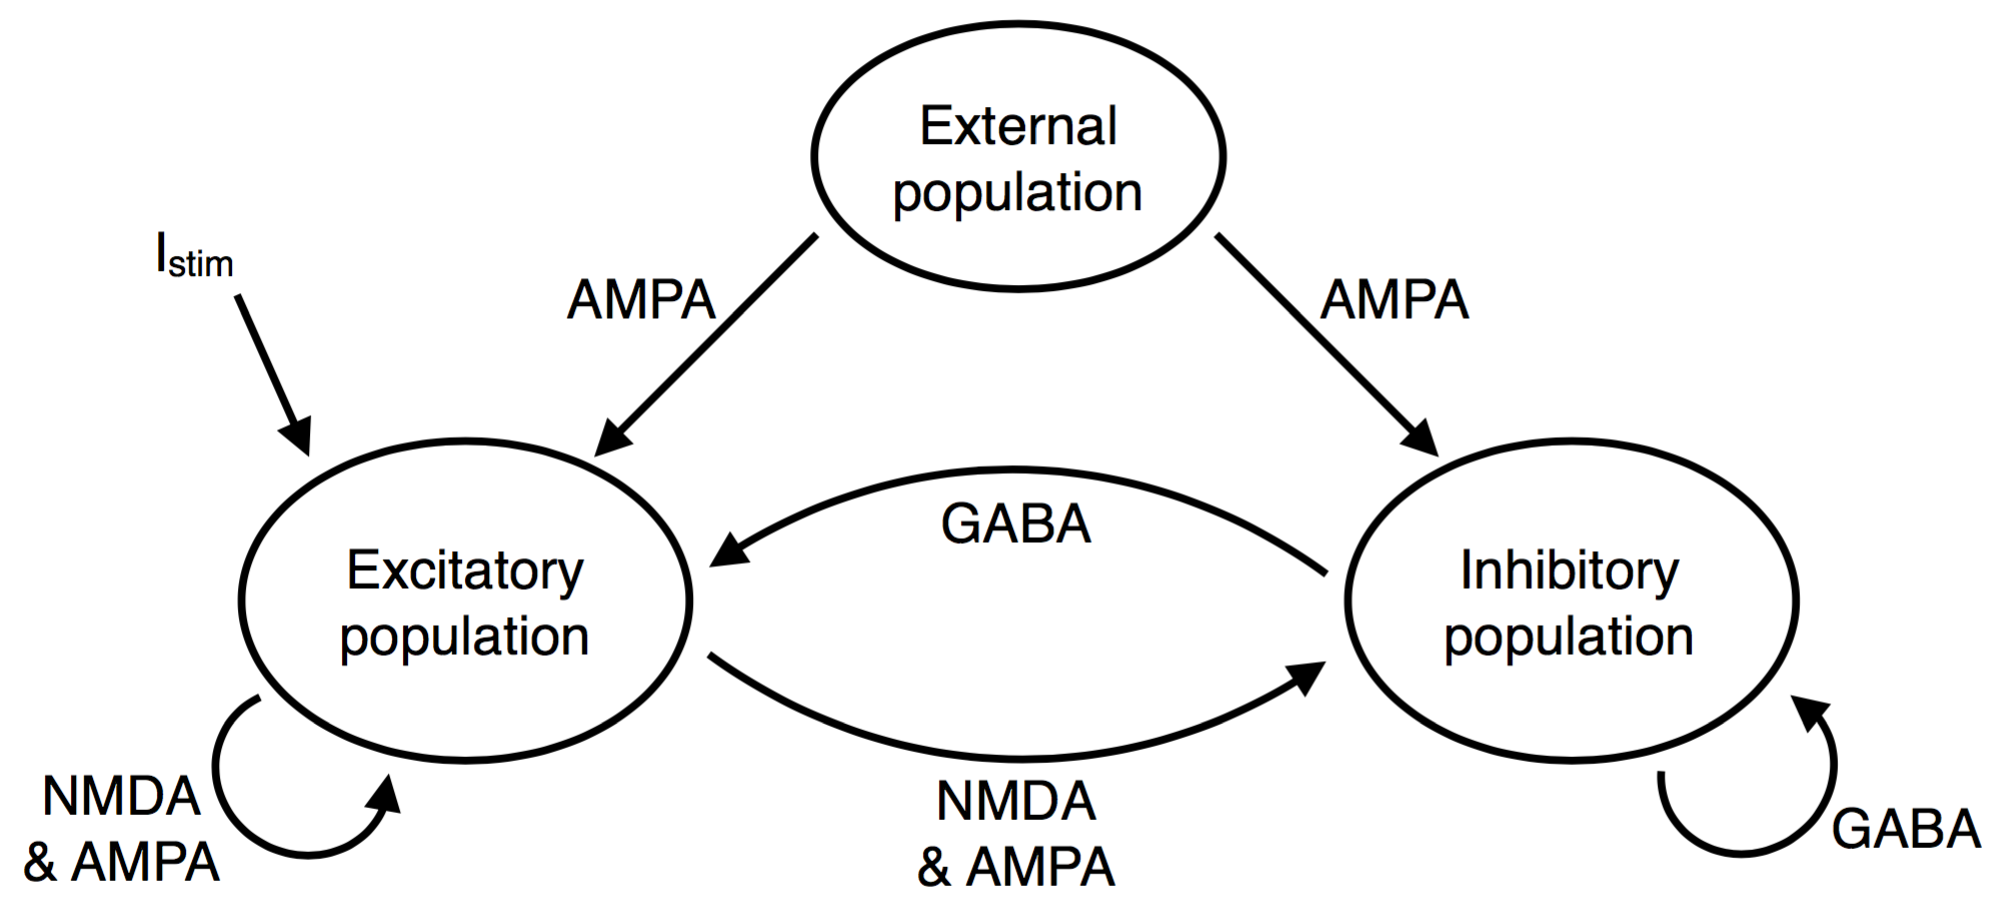

Network structure. Look at Figure 18.4 in chapter 18.1 to see how the excitatory population is spatially arranged on a ring and has a specific connectivity profile. In our implementation, every excitatory neuron receives unstructured input from all inhibitory neurons and structured input from all excitatory neurons. The inhibitory neurons receive unstructured input from all excitatory and all inhibitory neurons.

### 12.1.1. Question: External poisson population
Parameters that are not explicitly specified are set to default values. Read the documentation of the function `working_memory_network.wm_model.simulate_wm()` to answer the following questions:

- By default, how many neurons are in the external poisson population?
- Using the default parameters, what is the average number of spikes/second an excitatory neuron receives from the external population?

In [3]:
?wm_model.simulate_wm()

Ans: 
- 1000
- 1.4 Hz

From the documentation, follow the ‘source’ link to go to the implementation of `simulate_wm()`. Answer the following questions about the external poisson population:

- We use the Brian2 PoissonInput to implement the external population. Which post-synaptic variable is targeted by a presynaptic (poisson) spike?
- The dynamics of that variable are defined in the equations `excit_lif_dynamics` (still in the source code of simulate_wm). What is the time-scale of that variable (in milliseconds)?

Ans: 
- s_AMPA: 
- tau_AMPA:  .9 * 2.0 * b2.ms

### 12.1.2. Question: Unstructured input
Run the following code to simulate a network that receives unstructured poisson input.
- Without coding, from the plot: What is the population activity (mean firing rate) of the excitatory population at different points in time?
- Change the firing rate of the external population from 1.3Hz to 2.2Hz. What do you observe?
- Run the simulation a few times with r_ext = 2.2 Hz. Describe your observations.

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb5292e8>)

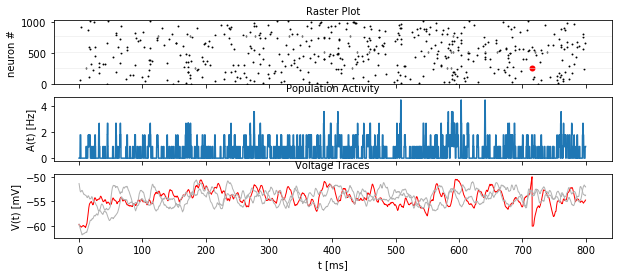

In [4]:
(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,
 idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib,
 voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile) = wm_model.simulate_wm(
    sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd98f8d0>)

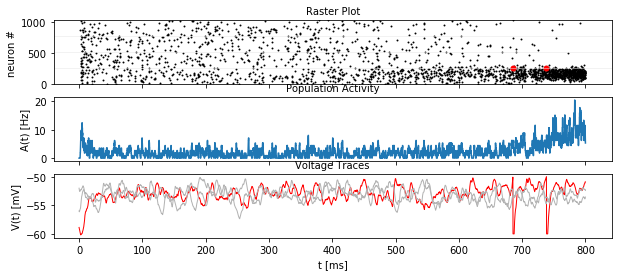

In [5]:
(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,
 idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib,
 voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile) = wm_model.simulate_wm(
    sim_time=800. * b2.ms, poisson_firing_rate=2.2 * b2.Hz, sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

### 12.1.3. Question: Weight profile
The function `simulate_wm()` takes two parameters to define the weight profile: `sigma_weight_profile` and `Jpos_excit2excit`. After the simulation you can access the return value `weight_profile_45`. This array contains the **synaptic weights between the one postsynaptic neuron whose preferred direction is 45deg and all other (presynaptic) neurons**. Our choice of 45deg is **arbitrary**, the profile for other neurons are shifted versions of this one.

- Run the following code to simulate the network.
- Increase `Jpos_excit2excit`. How does the weight profile change (look at short and long ranges)?
- Simulate with `Jpos_excit2excit` = 2.3. What do you observe?
- How does the weight profile change with the parameter `sigma_weight_profile`? How does the bump change with this parameter?

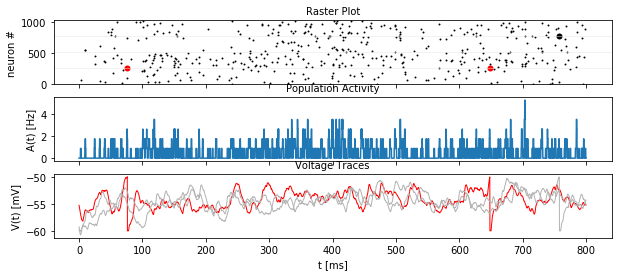

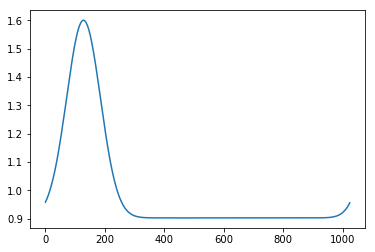

In [6]:
(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,
 idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, 
 voltage_monitor_inhib, idx_monitored_neurons_inhib, 
 weight_profile_45) = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, 
                                           sigma_weight_profile=20., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_45)

 把Jpos_excit2excit提高到2.3，weight_profile不变；而且神经元从100ms开始firing了。

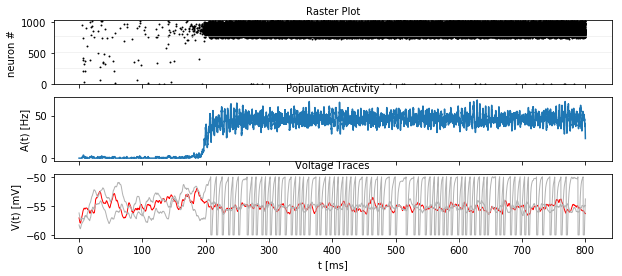

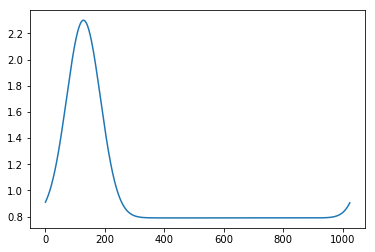

In [7]:
(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,
 idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, 
 voltage_monitor_inhib, idx_monitored_neurons_inhib, 
 weight_profile_45) = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, 
                                           sigma_weight_profile=20., Jpos_excit2excit=2.3)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_45)

改变sigma_weight_profile，从20改到40；weight_profile形成bump的标准差变大了。
而且神经元约从350ms开始firing了。

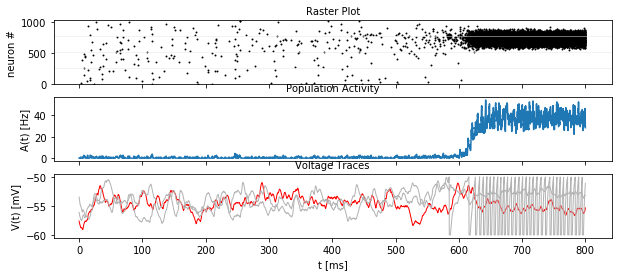

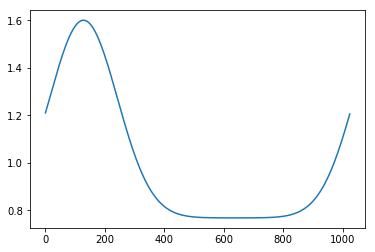

In [8]:
(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,
 idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, 
 voltage_monitor_inhib, idx_monitored_neurons_inhib, 
 weight_profile_45) = wm_model.simulate_wm(sim_time=800. * b2.ms, poisson_firing_rate=1.3 * b2.Hz, 
                                           sigma_weight_profile=40., Jpos_excit2excit=1.6)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)

plt.figure()
plt.plot(weight_profile_45)

## 12.2. Exercise: Network response to a structured input stimulus
We now apply a stimulus to a subset of the excitatory population. The network has the property of integrating input over time and keep a memory of the input stimulus. Using the following code, you can run a simulation with a weak input stimulus.

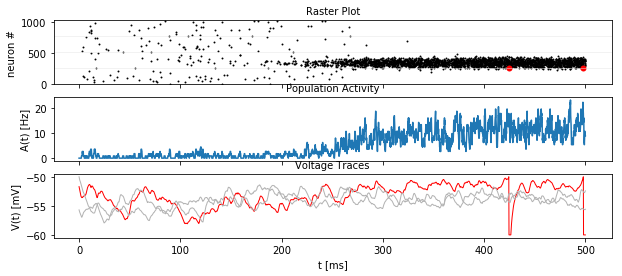

In [9]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, 
    t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

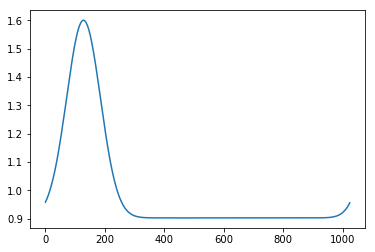

In [10]:
plt.plot(w_profile)

### 12.2.1. Question: Integration of input
Run the stimulation given above. Then answer the following questions qualitatively (by eye, from the raster plot)

- At which time can you identify a change in the population activity? How does that compare to the time when the stimulus is applied?
- What is the population activity at the end of the simulation?
- For the time point t=400ms, sketch the firing rate across the population (neuron index on the x-axis, per-neuron firing rate on the y-axis).
- Increase the stimulus strength to 0.5namp. What happens when the stimulus stops?
- Increase the stimulus width to 60deg (stimulus_strength=0.1 * b2.namp, stimulus center = 120deg). How does the bump shape change?

Ans:
- 250ms左右，刺激是100ms开始，持续200ms。
- around # 400 neuron

In [11]:
rate_monitor_excit.smooth_rate(window='gaussian', width=4*b2.ms)[4000]

11.28111147 * hertz

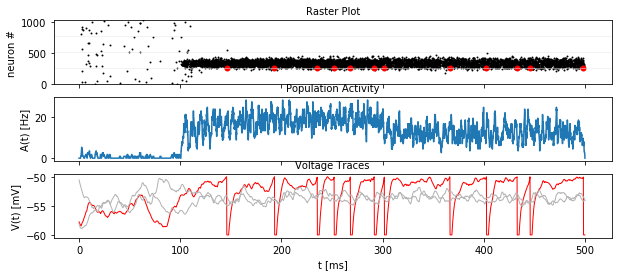

In [12]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.5 * b2.namp, 
    t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

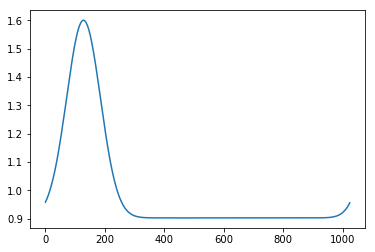

In [13]:
plt.plot(w_profile)

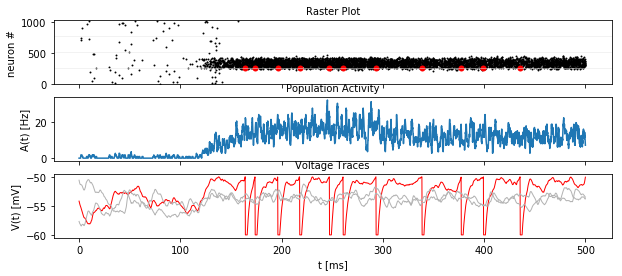

In [14]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, \
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, \
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120, stimulus_width_deg=60, stimulus_strength=.1 * b2.namp, 
    t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

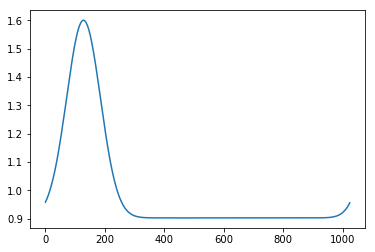

In [15]:
plt.plot(w_profile)

### 12.2.2. Question: Role of the inhibitory population
We can remove the inhibitory population by setting its size to the minimal size N_inhibitory = 1. If we also deactivate the external input we can study the effect of the recurrent weights within the excitatory population:

Parameters: N_inhibitory = 1, stimulus_strength=0.65 * b2.namp, t_stimulus_start=5 * b2.ms, t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms

- Before running the simulation: What do you expect to see?
- Run the simulation with the given parameters. Describe your observations.
Now run again a “normal” simulation:

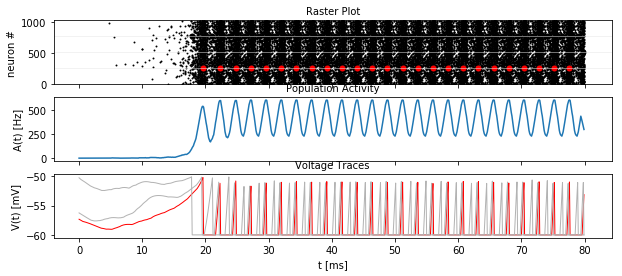

In [16]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,\
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib,\
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
    N_inhibitory = 1, 
    stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.065 * b2.namp, 
    t_stimulus_start=5 * b2.ms, t_stimulus_duration=25 * b2.ms, sim_time=80. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

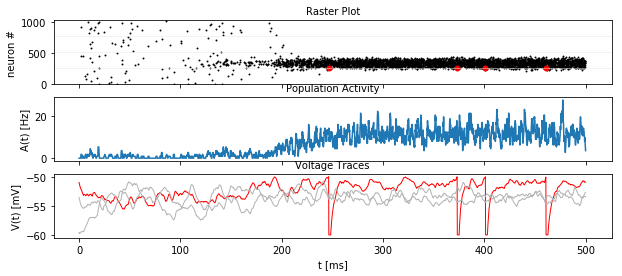

In [17]:
rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,\
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib,\
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, 
    t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

- As for the excitatory population, plot the raster, population activity and voltage traces for the inhibitory population.
- What is the role of the inhibitory population?

没有抑制神经元就疯狂spike，基本上没有记忆可以保存了。

## 12.3. Exercise: Decoding the population activity into a population vector
In the raster plot above we see that the population of spiking neurons keeps a memory of the stimulus. In this exercise we decode the population vector (i.e. the angle `theta` stored in the working memory) from the spiking activity. The **population vector is defined as the weighted (by spike counts) mean of the preferred directions of the neurons**. We access the data in the Brian2 SpikeMonitor returned by the simulation to calculate the population vector. Read the Brian2 documentation to see how one can access spike trains. Then implement the readout following the steps given here:

### 12.3.1. Mapping the neuron index onto its preferred direction
Write a function *get_orientation(idx_list, N)* which maps a vector of **neuron indices** `idx_list` onto a vector of **preferred directions**. `idx_list` is the subset of `k` monitored neurons. The second parameter `N` is the total number of neurons in the excitatory population. Verify your implementation by calling the function with the following example input:

In [18]:
def get_orientation(idx_list, N):
    unit = 360.0 / N
    return [(i + (i+1)) / 2.0 * unit for i in idx_list]

In [19]:
get_orientation([0, 1, 5, 10], 11) # [16.36, 49.09, 180.0, 343.64]

[16.363636363636363, 49.09090909090909, 180.0, 343.6363636363636]

In [20]:
get_orientation([0, 1, 499, 500, 999], 1000) # [0.18, 0.54, 179.82, 180.18, 359.82]

[0.18, 0.54, 179.82, 180.18, 359.82]

### 12.3.2. Extracting spikes from the spike monitor
The population vector `theta` changes over time due to drift and diffusion which is why we are interested in `theta(t)`. As we are dealing with **spikes** (discrete point events), and **a small number of neurons**, we have to **average** the population activity **over some time window around t**, `t_min=t - t_window_width/2, t_max =t + t_window_width/2`, to get an estimate of `theta(t)`.

Write a function *get_spike_count(spike_monitor, spike_index_list, t_min, t_max)* which returns **an array of spike counts** (one value for each neuron in spike_index_list). Be careful about the indexing: spike_index_list is a list of k neuron indices in [0, N-1] while the returned array spike_count_list is of length k.

The parameter spike_monitor is the spike_monitor_excit returned by the function simulate_wm(). The following pseudo-code and fragments are useful to implement get_spike_count:

In [21]:
def get_spike_count(spike_monitor, spike_index_list, t_min, t_max):
    nr_neurons = len(spike_index_list)
    spike_count_list = np.zeros(nr_neurons)
    spike_trains = spike_monitor.spike_trains()
    # loop over the list of neurons and get the spikes within the time window:
    for i in range(nr_neurons):
        # try sum(list of booleans)
        spike_count_list[i] = np.sum((spike_trains[i]>=t_min) ^ (spike_trains[i]<t_max))
    return spike_count_list

Do a plausibility check of your implementation: In one of the previous questions you have sketched the firing rates across the population at t=400ms. Use get_spike_count to plot the profile. Compare to your sketch. You can use the following code block. It’s assumed you have run a simulation and the two variables spike_monitor_excit and idx_monitored_neurons_excit are defined. Then play with the t_window parameter to get an intuition for ‘good’ values.

Text(0,0.5,'Spike rate [Hz]')

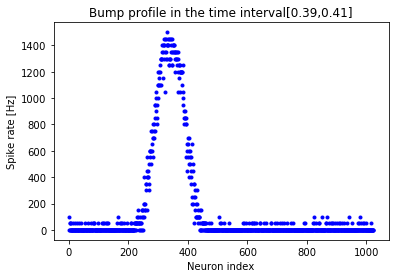

In [22]:
t = 400*b2.ms  # time point of interest
t_window = 20*b2.ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/b2.second
plt.plot(spike_rates, ".b")
plt.title("Bump profile in the time interval[{},{}]".format(t_min, t_max))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")

### 12.3.3. Computing the population vector
Combine the two previous functions to calculate theta(t). For our purpose, it is sufficient to calculate a weighted mean of preferred directions. It is **not necessary to correctly decode an angle close to 0deg = 360deg** (You can stimulate the network at 350deg to see the problem). Run a simulation and decode the population vector at the time when the stimulation ends. You should get a value close to the stimulus location.
- Pack the calculation of theta(t) into a function `get_theta_time_series` which takes an additional parameter `t_snapshots` (an array of time points at which you want to decode the population vector). 
- `get_theta_time_series` loops over all t_snapshots and calls `get_spike_count`. 
- Use your function to readout and visualize the evolution of theta. You can take some inspiration from the following code fragment:

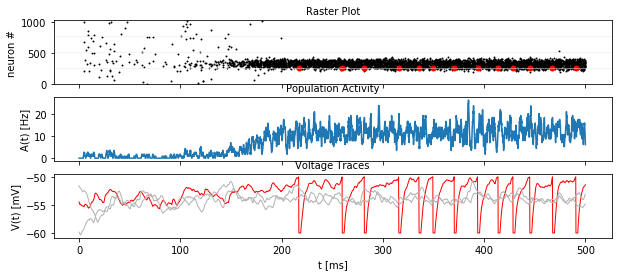

In [23]:
stimulus_center_deg=120
stimulus_width_deg=30
stimulus_strength=.06 * b2.namp
t_stimulus_start=100 * b2.ms
t_stimulus_duration=200 * b2.ms
sim_time=500. * b2.ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,\
idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib,\
voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
    stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, 
    t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=500. * b2.ms)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * b2.ms)
plt.show()

In [24]:
def get_theta_time_series(spike_monitor, idx_monitored_neurons, t_snapshots, t_window_width):
    idx_list = []
    for t in t_snapshots:
        t_min = t - t_window_width / 2
        t_max = t + t_window_width / 2
        spike_counts = get_spike_count(spike_monitor, idx_monitored_neurons, t_min, t_max)
        spike_rates = spike_counts/((t_max-t_min)/b2.second)
        weighted_idx = np.average(idx_monitored_neurons, weights=spike_rates)
        idx_list.append(spike_rates.argmax())
    ori = get_orientation(idx_list, len(idx_monitored_neurons))
    return ori

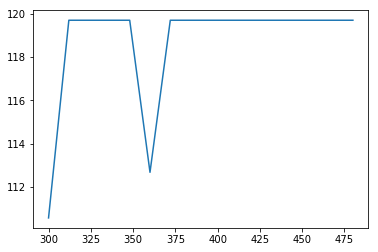

In [25]:
t_sim = sim_time
t_window_width = t_window
snapshot_interval = 0.005 * sim_time / t_stimulus_duration

# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
    int(math.floor((t_sim-t_window_width/2)/b2.ms)),  # high bound, subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/b2.ms))  # spacing between time stamps
    )*b2.ms

# how your function get_theta_time_series could be called:
theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, t_snapshots, t_window_width)

# plot theta vs time using pyplot
plt.plot(t_snapshots/b2.ms, theta_ts)

### 12.3.4. Exercise: Visualize the diffusion of the population vector
As mentioned above, the population vector changes over time due to drift and diffusion. In our implementation, because of homogeneous network properties (equal parameters, equal weights, shared presynaptic neurons) the **drift is zero**.

Use your functions developed in the previous questions to study the diffusion of the population vector:

- Simulate a network of size `N_excitatory` = 2048. Apply a stimulus from t=100ms to t=300ms. Plot theta(t). 
- Note that when you increase the size of the excitatory population you also have to increase the inhibitory population and the weights ("N_inhibitory" and "weight_scaling_factor"). When doubling the number of presynaptic neurons, you have to scale the weights by 0.5 to keep the total synaptic input the same.
- Repeat the simulation at least 3 times. Plot each time series theta(t) into the same figure.
- Change the size of the network to N_excitatory = 512 and redo the previous steps.
- Discuss your observations.

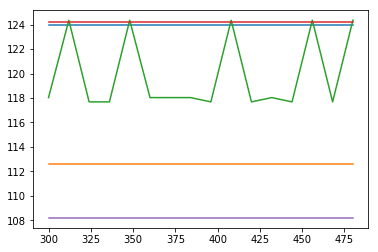

In [26]:
stimulus_center_deg=120
stimulus_width_deg=30
stimulus_strength=.06 * b2.namp
t_stimulus_start=100 * b2.ms
t_stimulus_duration=200 * b2.ms
sim_time=500. * b2.ms

t_sim = sim_time
t_window_width = t_window
snapshot_interval = 0.005 * sim_time / t_stimulus_duration

N_excitatory = 2048
weight_scaling_factor = 2.0 * 1024 / N_excitatory

for _ in range(5):
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,\
    idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib,\
    voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
        N_excitatory = N_excitatory, weight_scaling_factor=weight_scaling_factor,
        stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, 
        t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=1000. * b2.ms)

    # Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
    t_snapshots = range(
        int(math.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
        int(math.floor((t_sim-t_window_width/2)/b2.ms)),  # high bound, subtract half window. Avoids an out-of-bound error later.
        int(round(snapshot_interval/b2.ms))  # spacing between time stamps
        )*b2.ms

    # how your function get_theta_time_series could be called:
    theta_ts = get_theta_time_series(spike_monitor_excit, np.arange(N_excitatory), t_snapshots, t_window_width)
    
    # plot theta vs time using pyplot
    plt.plot(t_snapshots/b2.ms, theta_ts)

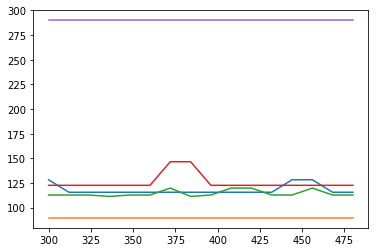

In [27]:
N_excitatory = 512
weight_scaling_factor = 2.0 * 1024 / N_excitatory

for _ in range(5):
    rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit,\
    idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib,\
    voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(
        N_excitatory = N_excitatory, weight_scaling_factor=weight_scaling_factor,
        stimulus_center_deg=120, stimulus_width_deg=30, stimulus_strength=.06 * b2.namp, 
        t_stimulus_start=100 * b2.ms, t_stimulus_duration=200 * b2.ms, sim_time=1000. * b2.ms)

    # Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
    t_snapshots = range(
        int(math.floor((t_stimulus_start+t_stimulus_duration)/b2.ms)),  # lower bound
        int(math.floor((t_sim-t_window_width/2)/b2.ms)),  # high bound, subtract half window. Avoids an out-of-bound error later.
        int(round(snapshot_interval/b2.ms))  # spacing between time stamps
        )*b2.ms

    # how your function get_theta_time_series could be called:
    theta_ts = get_theta_time_series(spike_monitor_excit, np.arange(N_excitatory), t_snapshots, t_window_width)
    
    # plot theta vs time using pyplot
    plt.plot(t_snapshots/b2.ms, theta_ts)

## 12.4. Reading exercise: slow and fast channels
The working memory circuit we study in this exercise combines three different receptors: NMDA and AMPA at excitatory synapses, and GABA at inhibitory synapses. A crucial element for this circuit is the slow dynamics of the NMDA receptor. Read the chapters 3.1 Synapses and look at Figure 3.2 to understand the dynamics of the receptors.




### 12.4.1. Question:
The dynamics of the NMDA receptor are implemented in the function simulate_wm(). Look for the equations excit_lif_dynamics in the source code.

In the model used here, what is the timescale (in milliseconds) of the fast rise? What is the timescale of the slow decay?

Ans:
- When tau is small, the time dynamic is fast.
- AMPA is fast, GABA is slow, NMDA is slow too.

## 12.5. References
[1] Compte, A., Brunel, N., Goldman-Rakic, P. S., & Wang, X. J. (2000). Synaptic mechanisms and network dynamics underlying spatial working memory in a cortical network model. Cerebral Cortex, 10(9), 910-923.

[2] Parts of this exercise and parts of the implementation are inspired by material from Stanford University, BIOE 332: Large-Scale Neural Modeling, Kwabena Boahen & Tatiana Engel, 2013, online available.